In [48]:
import pandas as pd

In [49]:
data=pd.read_csv(r".\data\gemstone.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [50]:
data.isnull().sum()

id              0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
x               0
y               0
z               0
price      129050
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322623 entries, 0 to 322622
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       322623 non-null  int64  
 1   carat    322623 non-null  float64
 2   cut      322623 non-null  object 
 3   color    322623 non-null  object 
 4   clarity  322623 non-null  object 
 5   depth    322623 non-null  float64
 6   table    322623 non-null  float64
 7   x        322623 non-null  float64
 8   y        322623 non-null  float64
 9   z        322623 non-null  float64
 10  price    193573 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 27.1+ MB


In [52]:
data.duplicated().sum()

np.int64(0)

In [53]:
data.shape

(322623, 11)

In [54]:
data=data.drop(labels=["id"],axis=1)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [55]:
# cat and num columns

categorical_columns=data.columns[data.dtypes=="object"]
numerical_columns=data.columns[data.dtypes!="object"]

In [56]:

data[categorical_columns].describe()

,cut,color,clarity
count,322623,322623,322623
unique,5,7,8
top,Ideal,G,SI1
freq,153677,73952,88608


In [57]:
data[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
322618,Ideal,D,VVS2
322619,Premium,D,SI1
322620,Premium,G,VVS2
322621,Ideal,D,I1


In [58]:

data[categorical_columns]["cut"].value_counts()

cut
Ideal        153677
Premium       83408
Very Good     63034
Good          19176
Fair           3328
Name: count, dtype: int64

In [59]:
data[categorical_columns]["color"].value_counts()

color
G    73952
E    59955
F    57025
H    51375
D    40453
I    29199
J    10664
Name: count, dtype: int64

In [60]:

data[categorical_columns]['clarity'].value_counts()

clarity
SI1     88608
VS2     80228
VS1     51188
SI2     50651
VVS2    26079
VVS1    17955
IF       7010
I1        904
Name: count, dtype: int64

In [61]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,322623.0,0.790115,0.462613,0.2,0.40,0.70,1.03,4.50
depth,322623.0,61.820553,1.081121,52.1,61.30,61.90,62.40,71.60
table,322623.0,57.232448,1.918876,49.0,56.00,57.00,58.00,79.00
x,322623.0,5.713894,1.109519,0.0,4.70,5.70,6.51,10.14
y,322623.0,5.718591,1.102394,0.0,4.71,5.72,6.51,10.14
z,322623.0,3.533268,0.689653,0.0,2.90,3.53,4.03,31.80
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


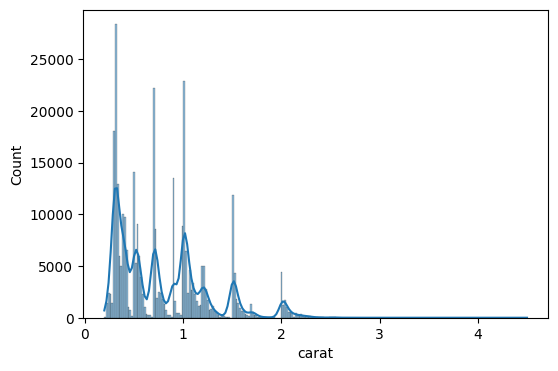

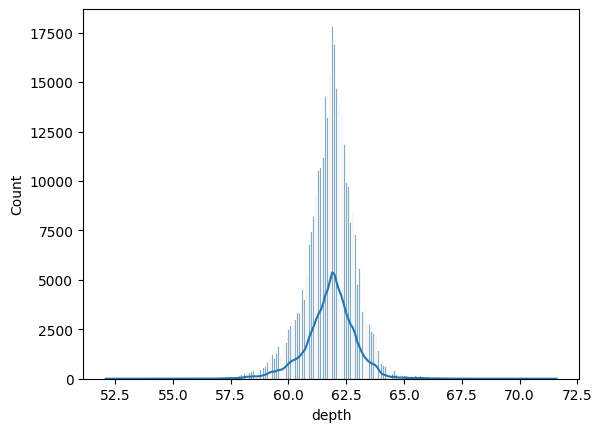

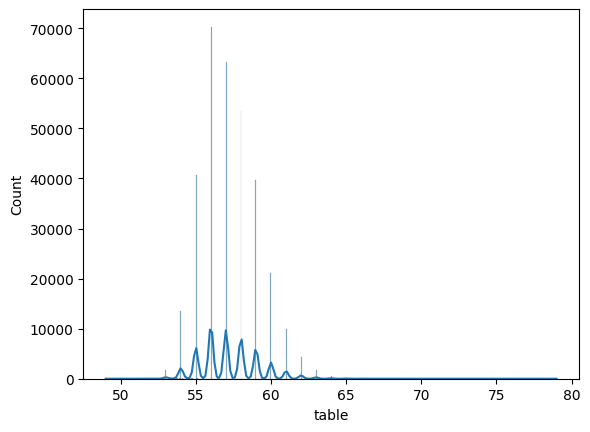

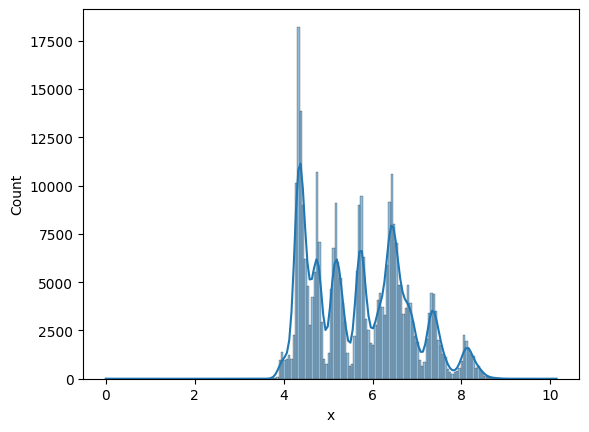

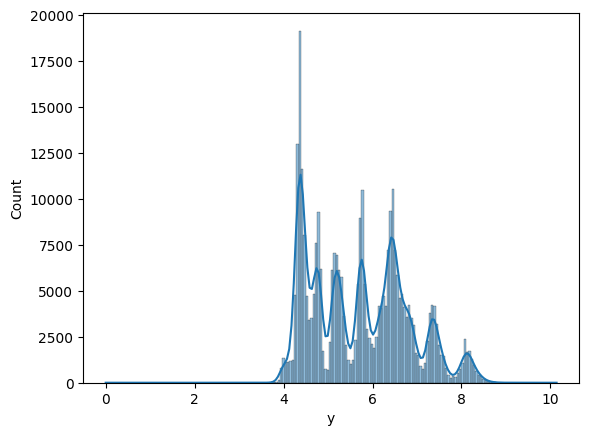

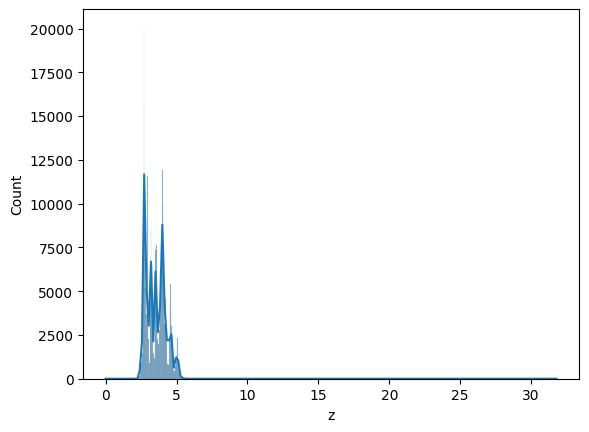

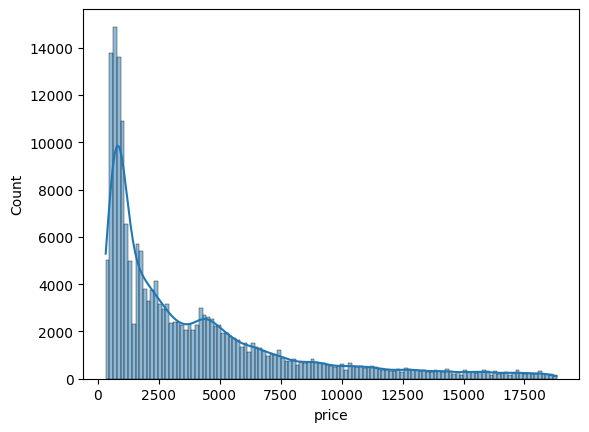

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

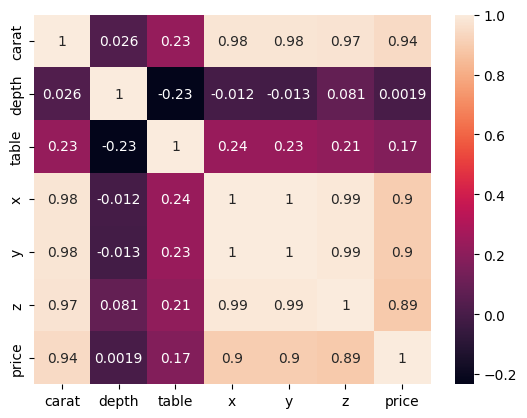

In [63]:

sns.heatmap(data[numerical_columns].corr(),annot=True)

In [64]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [65]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [66]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [67]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [43]:

# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [44]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [47]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
